<a href="https://colab.research.google.com/github/rishikeshdound/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Sentiment Analysis on IMBD Movie Review Data Using Deep Learning**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from numpy import array
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences  #for padding same length of input (does padding )
from keras.models import Sequential   #model used sequential
from keras.layers import Flatten, GlobalMaxPooling1D,Embedding,Conv1D,LSTM
from keras.layers import Activation,Dense,Dropout
from sklearn.model_selection import train_test_split


from nltk.corpus import stopwords


In [ ]:
# setting toolkit folder as working dir
%cd /content/drive/MyDrive/Colab Notebooks/sentiment_ana
! ls

/content/drive/MyDrive/Colab Notebooks/sentiment_ana
a1_IMDB_Dataset.csv   a3_IMDb_Unseen_Reviews.csv  Untitled4.ipynb
a2_glove.6B.100d.txt  c1_lstm_model_acc_0.864.h5


## Load Data

In [ ]:
movie_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment_ana/a1_IMDB_Dataset.csv')
movie_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
movie_review.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
movie_review.shape
# data has 50k rows and 2 cols

(50000, 2)

In [ ]:
# checking for missing or null values
movie_review.isnull().sum()


review       0
sentiment    0
dtype: int64

In [ ]:
movie_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
movie_review['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Data Preprocessing


In [ ]:
movie_review['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
# using custom preprocess function from py module

Reviews consist of noise such as html tags, puncuations,brackets,numbers ('<br/br>,-,\ )etc needs to be removed  by using regular expression  (re)

In [ ]:
tag = re.compile(r'<[^>]+>')  #re module removes 'r pattern

def remove_tag(text):

  return tag.sub(" ",text)     #replaces the pattern with empty space


In [ ]:
# removing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Preprocessor Function steps to perform


1.   lowercase the tect data
2. remove tags
2.   remove stop words
3. single char removal ex(',mark's)
4. trailing spaces
5. punctuations and numbers,digits




In [ ]:
# Causes the resulting RE to match 1 or more repetitions of the preceding RE. ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.

In [ ]:
def preprocess(sen):

  corpus = sen.strip().lower()

  corpus = remove_tag(corpus)  #removing html tags

  corpus = re.sub('[^A-Za-z]'," ",corpus) #for number and punctation

  corpus  = re.sub(r'\s+[A-Za-z]\s+'," ",corpus)   #single char removal like apostrophe

  corpus = re.sub(r'\s+'," ",corpus)  #remove multiple spaces

  # remove stopwords

  pattern  =  re.compile(r'\b('+ r'|'.join(stopwords.words('english')) + r')\b\s*' )
  corpus = pattern.sub('',corpus)

  return corpus

In [ ]:
# calling preprocessor fun on movie review

X= []

text = list(movie_review['review'])

for tex in text:
  X.append(preprocess(tex))

In [ ]:
X[1]


'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done '

In [ ]:
# text = list(movie_review['review'])
# text

In [ ]:
movie_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Converting sentiments to labels

y = movie_review['sentiment']
y = np.where(y == 'positive',1,0)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test ,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=45)
# splitiing data for trainig and evaluation purpose

## Word Embedding


In [ ]:
# embedding layer takes inputs in numeric form
# steps to follow
# tokenize the corpus
# fit on training data
# text to seq method used to convert text to present in vec form



In [ ]:
tokens = Tokenizer()
tokens.fit_on_texts(X_train)


In [ ]:
X_train

In [ ]:
X_train = tokens.texts_to_sequences(X_train)

X_test = tokens.texts_to_sequences(X_test)




In [ ]:
# unique words in doc
uniq_len =  len(tokens.word_index)+1
uniq_len

# 1 is added for words who has 0 freq  or words which has no pretrained embedding

90579

In [ ]:
# Padding

max_pad =100 #no of words in sentemce
X_train = pad_sequences(X_train, padding="post", maxlen = max_pad)
X_test = pad_sequences(X_test,padding = 'post',maxlen = max_pad)




In [ ]:
# loading glove word embedding (global vector for representation )

from numpy import asarray
from numpy import zeros

embedding_dict = dict()

glove = open('/content/drive/MyDrive/Colab Notebooks/sentiment_ana/a2_glove.6B.100d.txt', encoding = "utf8"  )




In [ ]:
for line in glove:
  record = line.split()
  word = record[0]
  vector_dimension = asarray(record[1:],dtype='float32')
  embedding_dict[word] = vector_dimension
glove.close()

In [ ]:
# creating a matrix with 100
# conatains 100-d glove wordembedding for all words in corpus

emb_matrix = zeros((uniq_len,100)) #matrix with 0 vals

for word ,index in tokens.word_index.items():
  embedding_vector = embedding_dict.get(word)
  if embedding_vector is not None:
    emb_matrix[index] = embedding_vector

emb_matrix.shape


(90579, 100)

## Model Training With


### Simple Neural Net

In [ ]:
# defining neural network

neural_net = Sequential()

emb_layer = Embedding(uniq_len,100,weights = [emb_matrix],input_length=max_pad ,trainable =False)
neural_net.add(emb_layer)
neural_net.add(Flatten())
neural_net.add(Dense(1,activation='sigmoid'))

In [ ]:
# model compiling
neural_net.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['acc'])

print(neural_net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9057900   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9067901 (34.59 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9057900 (34.55 MB)
_________________________________________________________________
None


In [ ]:
# model training
neural_net_history = neural_net.fit(X_train,Y_train,batch_size=128, epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 3s 4ms/step - loss: 0.5579 - acc: 0.7128 - val_loss: 0.5129 - val_acc: 0.7544
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4486 - acc: 0.7957 - val_loss: 0.5121 - val_acc: 0.7591
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4099 - acc: 0.8160 - val_loss: 0.5273 - val_acc: 0.7494
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3880 - acc: 0.8279 - val_loss: 0.5282 - val_acc: 0.7542
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3740 - acc: 0.8366 - val_loss: 0.5425 - val_acc: 0.7560
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3579 - acc: 0.8437 - val_loss: 0.5541 - val_acc: 0.7538
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3518 - acc: 0.8455 - val_loss: 0.5688 - val_acc: 0.7470
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# predictions on test set
score  =  neural_net.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5973 - acc: 0.7451


In [ ]:
# model performance
print("Test Score :- ",score[0])
print('Test Accuracy :- ',score[1]
)

Test Score :-  0.5973334312438965
Test Accuracy :-  0.7451000213623047


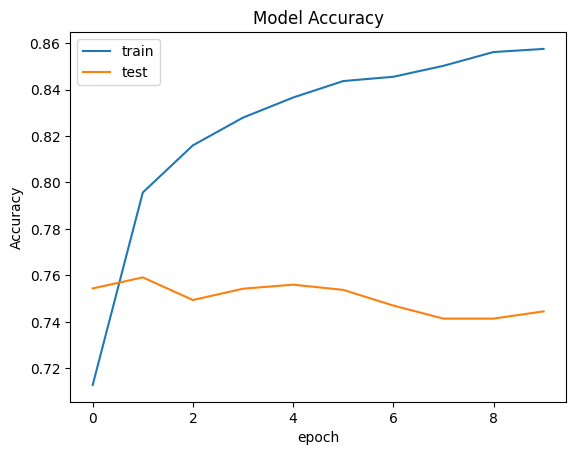

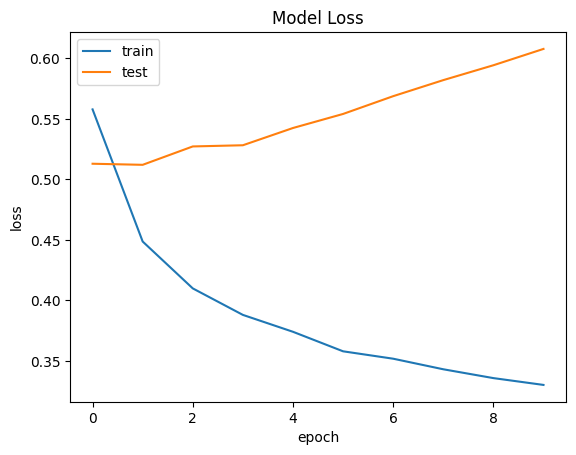

In [ ]:
# model performance chart
import matplotlib.pyplot as plt

plt.plot(neural_net_history.history['acc'])
plt.plot(neural_net_history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(neural_net_history.history['loss'])
plt.plot(neural_net_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

*italicized text*

### Convolution Neural Network

In [ ]:
from keras.layers import Conv1D

In [ ]:
# neural net architecture
cnn = Sequential()

embedding_layer=  Embedding(uniq_len,100,weights =[emb_matrix], input_length= max_pad , trainable = False)
cnn.add(embedding_layer)  #adding embd layer to model

cnn.add(Conv1D(128,5,activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(1,activation='sigmoid'))



In [ ]:
# Model compiling

cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9057900   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9122157 (34.80 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9057900 (34.55 MB)
_________________________________________________________________


In [ ]:
cnn_history = cnn.fit(X_train,Y_train , batch_size=128, epochs=10 ,verbose = 1,validation_split= 0.2)

Epoch 1/10
250/250 [==============================] - 4s 5ms/step - loss: 0.4742 - acc: 0.7716 - val_loss: 0.3852 - val_acc: 0.8324
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3359 - acc: 0.8585 - val_loss: 0.3607 - val_acc: 0.8419
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2807 - acc: 0.8874 - val_loss: 0.3490 - val_acc: 0.8462
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2390 - acc: 0.9114 - val_loss: 0.3637 - val_acc: 0.8441
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1972 - acc: 0.9339 - val_loss: 0.3557 - val_acc: 0.8471
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1632 - acc: 0.9509 - val_loss: 0.3838 - val_acc: 0.8339
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1330 - acc: 0.9653 - val_loss: 0.3608 - val_acc: 0.8472
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
score = cnn.evaluate(X_test,Y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3715 - acc: 0.8535


In [ ]:
# model performance
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]*100}')

Test Score: 0.34259146451950073
Test Accuracy: 85.35000085830688


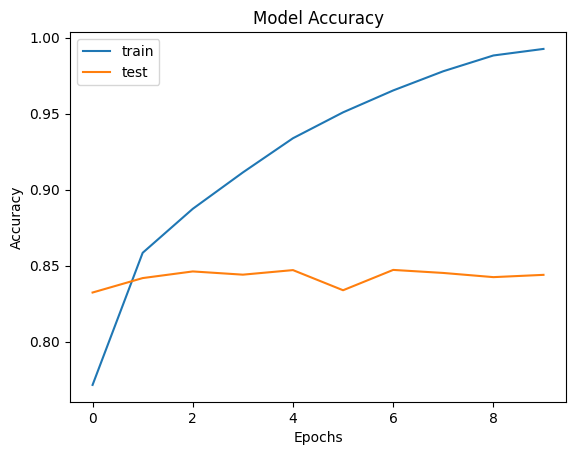

In [ ]:
# model Performance plots

plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
# plt.plot(cnn_history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

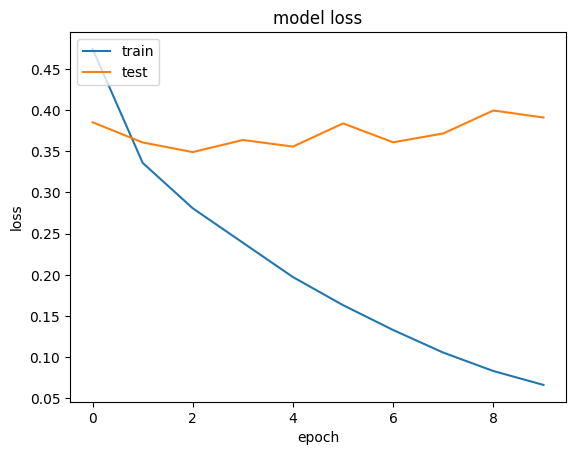

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Recurrent Neural Network (Lstm)

In [ ]:
from keras.layers import LSTM


In [ ]:
lstm_model =  Sequential()

embd_layer  = Embedding(uniq_len,100,weights = [emb_matrix],input_length=max_pad,trainable=False)
lstm_model.add(embd_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1,activation='sigmoid'))


In [ ]:
# Model Compiling
lstm_model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['acc'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          9057900   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9175277 (35.00 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9057900 (34.55 MB)
_________________________________________________________________


In [ ]:
lstm_model_history = lstm_model.fit(X_train,Y_train,batch_size = 128, epochs=6,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 4s 10ms/step - loss: 0.4981 - acc: 0.7501 - val_loss: 0.4308 - val_acc: 0.7958
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.4036 - acc: 0.8222 - val_loss: 0.3920 - val_acc: 0.8205
Epoch 3/6
250/250 [==============================] - 2s 8ms/step - loss: 0.3603 - acc: 0.8447 - val_loss: 0.3616 - val_acc: 0.8436
Epoch 4/6
250/250 [==============================] - 2s 8ms/step - loss: 0.3409 - acc: 0.8584 - val_loss: 0.3527 - val_acc: 0.8444
Epoch 5/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3123 - acc: 0.8708 - val_loss: 0.4075 - val_acc: 0.8264
Epoch 6/6
250/250 [==============================] - 2s 9ms/step - loss: 0.2919 - acc: 0.8807 - val_loss: 0.3466 - val_acc: 0.8503


In [ ]:
score= lstm_model.evaluate(X_test,Y_test,verbose = 1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3426 - acc: 0.8535


In [ ]:
# Model Performance
print(f'Test Score : {score[0]}')
print(f'Test Accuracy: {score[1]}')

Test Score : 0.34259146451950073
Test Accuracy: 0.8535000085830688


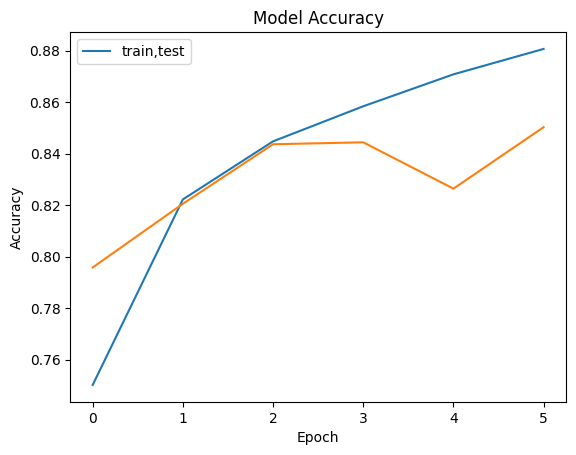

In [ ]:
# model performance charts

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train,test'],loc = 'upper left')
plt.show()

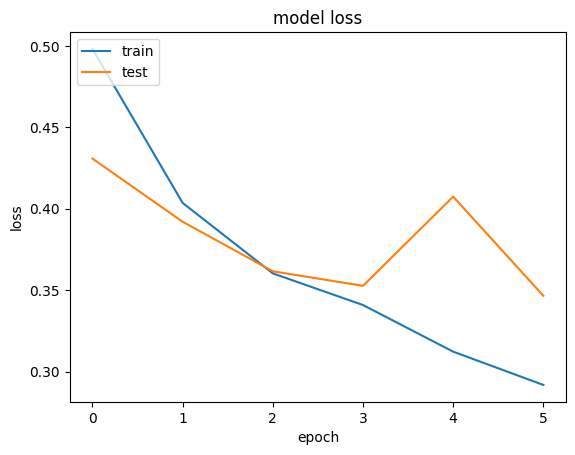

In [ ]:
# model loss
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
lstm_model.save(f'./lstm_model_acc{round(score[1],3)}.h5',save_format = 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Making predictions on Unseen Dataset

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/sentiment_ana'

In [ ]:
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/sentiment_ana/lstm_model_acc0.854.h5'
pretrained_model = load_model(model_path)

In [ ]:
pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          9057900   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9175277 (35.00 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9057900 (34.55 MB)
_________________________________________________________________


In [ ]:
review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment_ana/a3_IMDb_Unseen_Reviews.csv')

In [ ]:
review.head()

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


In [ ]:
review['Review Text'][2]

"Poor story, only reasonable otherwise.\nIf I had realised this was by Alex Garland I would not have bothered watching. I remember reading his book the Beach years ago and thinking 'there's something not very nice about this'. At the time I wasn't sure what it was. But now having seen Ex Machina, I have the same feeling. That the story has been chosen simply to appeal to a large audience, in a rather manipulative, unthinking and unfeeling way.\n\nI don't normally write bad reviews - of anything. Preferring to focus on the positive. But I so dislike this I felt I had to write something to put people off wasting their time, or assimilating some of this 'nastiness'.\n\nIn the case of Ex Machina I can just imagine Garland wondering what he would do for his next project, googling AI and quickly finding the AI Box Experiment. And rather than do the heart- and soul-searching work that would be necessary to produce anything original I imagine him quickly turning somebody else's idea into his n

In [ ]:

text_reviews = list(review['Review Text'])

unseen_processed = []

for reviews in text_reviews:
  unseen_processed.append(preprocess(reviews))


# unseen_processed = []

# text = list(movie_review['review'])

# for tex in text:
#   X.append(preprocess(tex))

In [ ]:
unseen_processed


In [ ]:
# tokenization of text
unseen_token = tokens.texts_to_sequences(unseen_processed)

# pooling instance to have max len of 100 tokens

unseen_padded = pad_sequences(unseen_token,padding = 'post',maxlen= max_pad)


In [ ]:
# passing tokens to lstm model best performed among 3
unseen_sentiment = lstm_model.predict(unseen_padded)
unseen_sentiment

1/1 [==============================] - 0s 114ms/step


array([[0.8826395 ],
       [0.9946845 ],
       [0.15797566],
       [0.64053845],
       [0.97863746],
       [0.06803669]], dtype=float32)

In [ ]:
review.head(2)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10


In [ ]:
# saving  output on google drive in form of dataframe

review['Predicted Sentiments'] = np.round(unseen_sentiment*10,1) #multiplied by 10 for range(0-10)

df_prediction_sentiments = pd.DataFrame(review['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_Movie = pd.DataFrame(review['Movie'],columns = ['Movie'])
df_review_text = pd.DataFrame(review['Review Text'],columns = ['Review Text'])
df_imdb_ratings = pd.DataFrame(review['IMDb Rating'],columns = ['IMDb Rating'])


df = pd.concat([df_Movie,df_review_text,df_imdb_ratings,df_prediction_sentiments],axis =1)
df.to_csv('./unseen_Predictions.csv',sep = ',',encoding='UTF-8')
df.head(5)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,8.8
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,1.6
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,6.4
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.8


In [ ]:
# saving model as a pickel file
import pickle
pickle.dump(lstm_model,open('model.pkl','wb'))